In [1]:

!pip install numpy pandas matplotlib seaborn scikit-learn scipy kaggle -q

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from scipy.optimize import linear_sum_assignment


Nombre d'images: 1797
Dimensions: 64 pixels (8x8)
Nombre de classes: 10


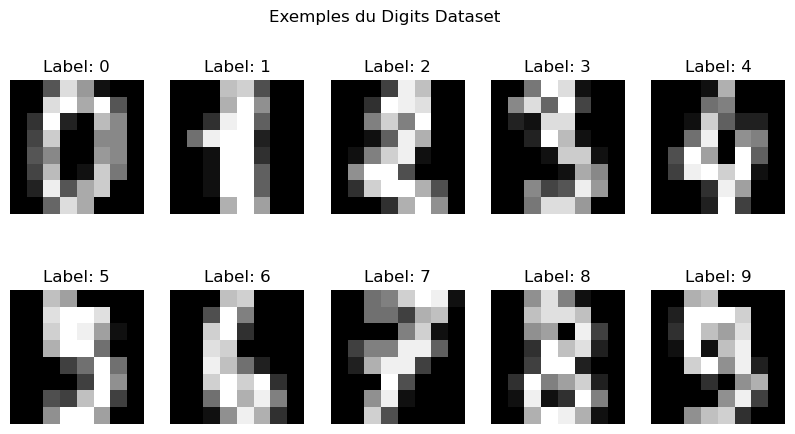

In [38]:

digits = load_digits()
X = digits.data
y = digits.target

print(f"Nombre d'images: {X.shape[0]}")
print(f"Dimensions: {X.shape[1]} pixels (8x8)")
print(f"Nombre de classes: {len(np.unique(y))}")

# Visualisation de quelques images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')
plt.suptitle("Exemples du Digits Dataset")
plt.show()

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Moyenne avant normalisation: {X.mean():.2f}, écart-type: {X.std():.2f}")
print(f"Moyenne après normalisation: {X_scaled.mean():.2f}, écart-type: {X_scaled.std():.2f}")

Moyenne avant normalisation: 4.88, écart-type: 6.02
Moyenne après normalisation: 0.00, écart-type: 0.98


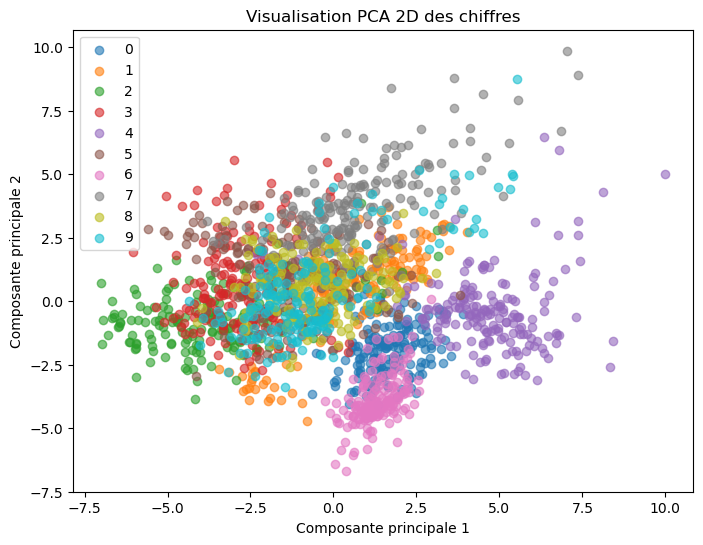

In [30]:

pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
for digit in np.unique(y):
    plt.scatter(X_pca_2d[y==digit,0], X_pca_2d[y==digit,1], label=str(digit), alpha=0.6)
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("Visualisation PCA 2D des chiffres")
plt.legend()
plt.show()


In [40]:

def hungarian_mapping(cluster_labels, true_labels):
    n_clusters = len(np.unique(cluster_labels))
    n_classes = len(np.unique(true_labels))
    contingency = np.zeros((n_clusters, n_classes))
    for i in range(len(cluster_labels)):
        contingency[cluster_labels[i], true_labels[i]] += 1
    row_ind, col_ind = linear_sum_assignment(-contingency)
    mapping = {row: col for row, col in zip(row_ind, col_ind)}
    clusters_mapped = np.array([mapping[label] for label in cluster_labels])
    return clusters_mapped, mapping

In [41]:

# K-Means sans PCA
kmeans_basic = KMeans(n_clusters=10, random_state=42, n_init=20)
kmeans_basic.fit(X_scaled)
clusters_basic = kmeans_basic.predict(X_scaled)
clusters_mapped_basic, mapping_basic = hungarian_mapping(clusters_basic, y)

In [42]:
# K-Means avec PCA 
pca_reduced = PCA(n_components=0.95, random_state=42)
X_pca_reduced = pca_reduced.fit_transform(X_scaled)
kmeans_pca = KMeans(n_clusters=10, random_state=42, n_init=20)
kmeans_pca.fit(X_pca_reduced)
clusters_pca = kmeans_pca.predict(X_pca_reduced)
clusters_mapped_pca, mapping_pca = hungarian_mapping(clusters_pca, y)


In [43]:
def evaluate(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
    return accuracy, precision, recall, f1

metrics_basic = evaluate(y, clusters_mapped_basic)
metrics_pca = evaluate(y, clusters_mapped_pca)

print("Performance K-Means sans PCA:")
print(f"  Accuracy: {metrics_basic[0]:.2%}, Precision: {metrics_basic[1]:.2%}, Recall: {metrics_basic[2]:.2%}, F1-score: {metrics_basic[3]:.2%}")

print("Performance K-Means avec PCA:")
print(f"  Accuracy: {metrics_pca[0]:.2%}, Precision: {metrics_pca[1]:.2%}, Recall: {metrics_pca[2]:.2%}, F1-score: {metrics_pca[3]:.2%}")

Performance K-Means sans PCA:
  Accuracy: 60.88%, Precision: 61.61%, Recall: 60.85%, F1-score: 58.69%
Performance K-Means avec PCA:
  Accuracy: 58.88%, Precision: 59.82%, Recall: 58.86%, F1-score: 56.77%


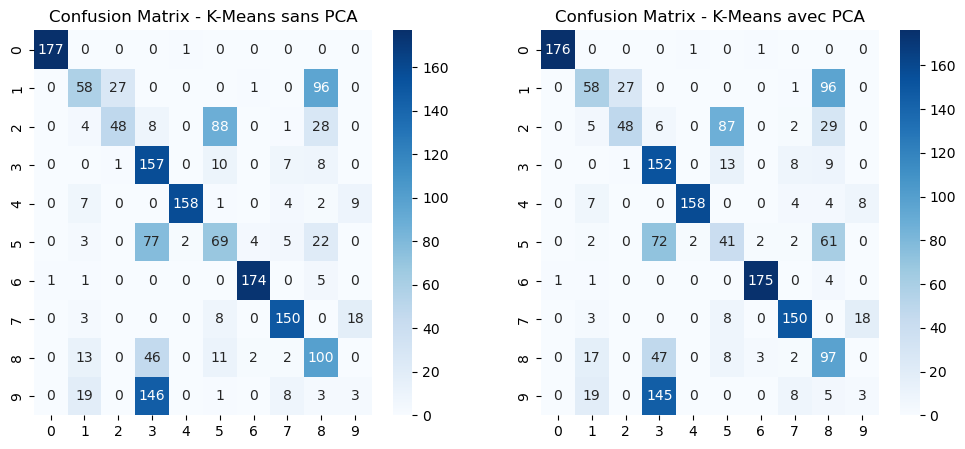

In [44]:
# Matrices de confusion
cm_basic = confusion_matrix(y, clusters_mapped_basic)
cm_pca = confusion_matrix(y, clusters_mapped_pca)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(cm_basic, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - K-Means sans PCA")
plt.subplot(1,2,2)
sns.heatmap(cm_pca, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - K-Means avec PCA")
plt.show()

In [45]:
print("\nComparaison ligne par ligne :")
for true_label, pred_label in zip(y, clusters_mapped_pca):
    print(f"Vrai : {true_label}   |   Prédit : {pred_label}")



Comparaison ligne par ligne :
Vrai : 0   |   Prédit : 0
Vrai : 1   |   Prédit : 8
Vrai : 2   |   Prédit : 8
Vrai : 3   |   Prédit : 3
Vrai : 4   |   Prédit : 4
Vrai : 5   |   Prédit : 3
Vrai : 6   |   Prédit : 6
Vrai : 7   |   Prédit : 7
Vrai : 8   |   Prédit : 3
Vrai : 9   |   Prédit : 3
Vrai : 0   |   Prédit : 0
Vrai : 1   |   Prédit : 1
Vrai : 2   |   Prédit : 2
Vrai : 3   |   Prédit : 3
Vrai : 4   |   Prédit : 4
Vrai : 5   |   Prédit : 5
Vrai : 6   |   Prédit : 6
Vrai : 7   |   Prédit : 7
Vrai : 8   |   Prédit : 8
Vrai : 9   |   Prédit : 3
Vrai : 0   |   Prédit : 0
Vrai : 1   |   Prédit : 1
Vrai : 2   |   Prédit : 8
Vrai : 3   |   Prédit : 3
Vrai : 4   |   Prédit : 1
Vrai : 5   |   Prédit : 8
Vrai : 6   |   Prédit : 6
Vrai : 7   |   Prédit : 1
Vrai : 8   |   Prédit : 8
Vrai : 9   |   Prédit : 3
Vrai : 0   |   Prédit : 0
Vrai : 9   |   Prédit : 3
Vrai : 5   |   Prédit : 5
Vrai : 5   |   Prédit : 5
Vrai : 6   |   Prédit : 6
Vrai : 5   |   Prédit : 5
Vrai : 0   |   Prédit : 0
Vrai : 